# Prediction by an actual quantum computer
- First, models should be trained qith Qulacs because of its higher accuracy and faster time
- Second, predict values using Qiskit
    - Simulator
    - Real Quantum machine
        - Account is needed
        - The ibm server is crowded. it will take long hours

In [1]:
%load_ext autoreload
%autoreload 2
from qcl.Qiskit.QiskitRegressor import QiskitRegressor
import numpy as np
from qcl.regressors.StandardQCLRegressor import StandardQCLRegressor
from qcl.gates.NeighborCNOTRotationGates import NeighborCNOTRotationGates 
from qcl.Encoders.WEncoder import WEncoder
from qcl.Encoders.XYEncoder import XYEncoder
from qcl.utils.solver import basinhopping_solver

import matplotlib.pyplot as plt

from qcl.testing.OneDimDataset import prepare_dataset,eval
from sklearn.metrics import mean_squared_error

loss 0.000041364049769


[0.11793016432395372,
 0.13925597072916965,
 0.010000000000000044,
 1.0816000000000014]

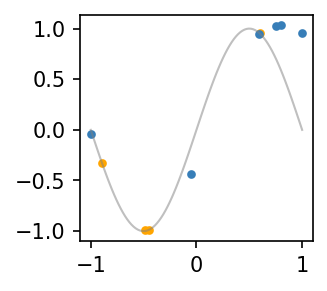

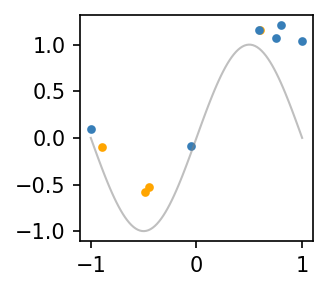

In [25]:
depth=4
n_qubit=2
n=10

mode="linear"
mode="sin"
# normal simulation

def custom_basinhopping_solver(cost_func, theta_0, n_iter=0):
    return basinhopping_solver(cost_func, theta_0, n_iter=n_iter, verbose=True,xmax=1,xmin=-1)


tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y=prepare_dataset(n_all_record=n,mode=mode,plot=False)

st_model=StandardQCLRegressor(n_qubit=n_qubit,x_dim=1,
                            vqe_gates=NeighborCNOTRotationGates(
                            n_qubit=n_qubit,
                            depth=depth,
                            add_y_gates=True),
                            encoder=XYEncoder(n_qubit=n_qubit),
                            solver=custom_basinhopping_solver,)

st_model.fit(tr_X,tr_y)

plt.figure(figsize=(2,2),dpi=150)
ax = plt.gca()
eval(ax,st_model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y)


# predict by sampling via Qiqskit (simulation)
# response becomes more different from qulacs when circuit becomes larger


# copy trained data
model=QiskitRegressor(n_qubit=n_qubit,x_dim=1,depth=depth,shots=1000,theta_list=st_model.vqe_gates.get_params(),scale_coeff=2)
model=QiskitRegressor(n_qubit=n_qubit,x_dim=1,depth=depth,shots=1000,theta_list=st_model.vqe_gates.get_params(),add_y_gates=True)

#after copy
plt.figure(figsize=(2,2),dpi=150)
ax = plt.gca()
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y,plot=True)


In [26]:
#compare circuits
from qulacsvis import circuit_drawer
circuit_drawer(st_model.vqe_gates.circuit)
print(model.cicuit.draw())
print(st_model.vqe_gates.get_params())



###############################################################################
>> 0
           ___     ___     ___     ___     ___     ___     ___             ___ 
          |pRX|   |pRY|   |pRX|   |CX |   |pRX|   |pRY|   |pRX|           |pRX|
----●-----|   |---|   |---|   |---|   |---|   |---|   |---|   |-----●-----|   |
    |     |___|   |___|   |___|   |___|   |___|   |___|   |___|     |     |___|
   _|_     ___     ___     ___      |      ___     ___     ___     _|_     ___ 
  |CX |   |pRX|   |pRY|   |pRX|     |     |pRX|   |pRY|   |pRX|   |CX |   |pRX|
--|   |---|   |---|   |---|   |-----●-----|   |---|   |---|   |---|   |---|   |
  |___|   |___|   |___|   |___|           |___|   |___|   |___|   |___|   |___|

###############################################################################
>> 1
    ___     ___     ___     ___     ___     ___   
   |pRY|   |pRX|   |CX |   |pRX|   |pRY|   |pRX|  
---|   |---|   |---|   |---|   |---|   |---|   |--
   |___|   |___|   |___|   |___|   

In [ ]:
# you will need to set your api token to run actual quantum machines
from qiskit import IBMQ
IBMQ.save_account('MY_API_TOKEN')

initiated ibmq_bogota
[-0.89373088] 0.03600000000000003
[-0.49080873] -0.06799999999999995
[-0.44520069] -0.01200000000000001
[0.59939932] 0.6160000000000001
[0.74995936] 0.6279999999999999
[0.59259265] 0.542
[0.79645212] 0.526
[-0.05583564] 0.15799999999999992
[-1.] 0.06000000000000005
[1.] 0.494


[0.47701687384725,
 0.19122652403491824,
 0.014400000000000055,
 0.9761440000000016]

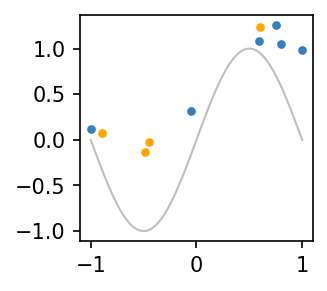

In [27]:
#predict actual quantum computing (takes a very long time!)
model.init_IBMQ(machine="ibmq_bogota")
model.simulate=False

#predict
plt.figure(figsize=(2,2),dpi=150)
ax = plt.gca()
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y,plot=True)